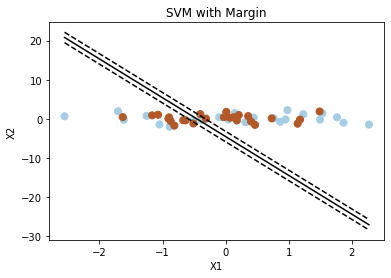

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples=50):
    # Generate random data points
    np.random.seed(0)
    X = np.random.randn(n_samples, 2)
    y = np.concatenate([-np.ones((n_samples // 2)), np.ones((n_samples // 2))])
    return X, y

def svm_fit(X, y, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    
    # Initialize weights and bias
    w = np.zeros(n_features)
    b = 0
    
    # Gradient descent
    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            condition = y[idx] * (np.dot(x_i, w) - b) >= 1
            
            if condition:
                w -= learning_rate * (2 * lambda_param * w)
            else:
                w -= learning_rate * (2 * lambda_param * w - np.dot(x_i, y[idx]))
                b -= learning_rate * y[idx]
    
    return w, b

def plot_margin(X, y, w, b):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=50)
    
    # Plot the decision boundary (hyperplane)
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_plot = slope * x_plot + intercept
    plt.plot(x_plot, y_plot, 'k-')
    
    # Plot the margin
    margin = 1 / np.linalg.norm(w)
    margin_x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    margin_y_up = slope * margin_x + intercept + margin
    margin_y_down = slope * margin_x + intercept - margin
    plt.plot(margin_x, margin_y_up, 'k--')
    plt.plot(margin_x, margin_y_down, 'k--')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('SVM with Margin')
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Generate data
    X, y = generate_data()

    # Training
    w, b = svm_fit(X, y)

    # Plot margin
    plot_margin(X, y, w, b)


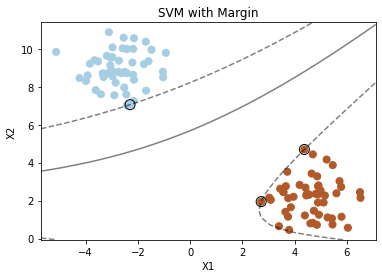

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate well-separated clusters
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Ensure labels are {-1, 1}
y[y == 0] = -1

# Train SVM
svm = SVC(kernel='poly', degree=2, C=1)
svm.fit(X, y)

# Plot decision boundary and margins
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=50)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('SVM with Margin')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

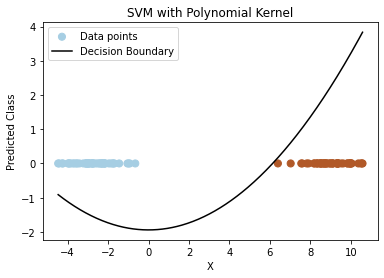

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate one-dimensional dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=1, random_state=42)

# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=2, C=1)
svm_poly.fit(X, y)

# Plot decision boundary and data points
plt.scatter(X, np.zeros_like(X), c=y, cmap=plt.cm.Paired, marker='o', s=50, label='Data points')

# Plot decision boundary
x_values = np.linspace(np.min(X), np.max(X), num=500).reshape(-1, 1)
y_values = svm_poly.decision_function(x_values)
plt.plot(x_values, y_values, color='black', linestyle='-', label='Decision Boundary')

plt.title('SVM with Polynomial Kernel')
plt.xlabel('X')
plt.ylabel('Predicted Class')
plt.legend()
plt.show()


In [25]:
import numpy as np

def polynomial_kernel(x1, x2, degree=3):
    return (np.dot(x1, x2) + 1) ** degree

def svm_fit(X, y, learning_rate=0.001, lambda_param=0.01, n_iters=1000, degree=3):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            y_true = y[idx]
            linear_output = np.dot(x_i, weights) + bias
            y_pred = np.sign(linear_output)

            if y_true * y_pred <= 1:
                delta_weights = learning_rate * (2 * lambda_param * weights - np.dot(x_i, y_true))
                weights -= delta_weights
                bias -= learning_rate * y_true
    
    return weights, bias

def svm_predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return np.sign(linear_output)

# Example usage
if __name__ == "__main__":
    # Sample dataset (using Iris dataset for simplicity)
    X, y = make_blobs(n_samples=100, centers=2, n_features=1, random_state=42)

    weights, bias = svm_fit(X_train, y_train)

    plt.scatter(X, np.zeros_like(X), c=y, cmap=plt.cm.Paired, marker='o', s=50, label='Data points')

    # Plot decision boundary
    x_values = np.linspace(np.min(X), np.max(X), num=500).reshape(-1, 1)
    y_values = svm_poly.decision_function(x_values)
    plt.plot(x_values, y_values, color='black', linestyle='-', label='Decision Boundary')

    plt.title('SVM with Polynomial Kernel')
    plt.xlabel('X')
    plt.ylabel('Predicted Class')
    plt.legend()
    plt.show()


NameError: name 'X_train' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

# Define the architecture of the neural network
def create_multilayer_nn(input_shape, num_classes):
    model = models.Sequential([
        layers.Dense(4, activation='relu', input_shape=input_shape),
        layers.Dense(4, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example usage:
input_shape = (5,)  # Example: MNIST dataset with 28x28 images flattened
num_classes = 2  # Example: 10 classes for MNIST digits

# Create the model
model = create_multilayer_nn(input_shape, num_classes)

# Print model summary
model.summary()

# Plot the model graphically
# Plot the model graphically
# tf.keras.utils.plot_model(model, to_file='multilayer_nn.png', show_shapes=True, show_layer_names=True)

# Alternatively, you can display it using matplotlib
tf.keras.utils.plot_model(model, to_file='multilayer_nn.png', show_shapes=True, show_layer_names=True)
plt.show()

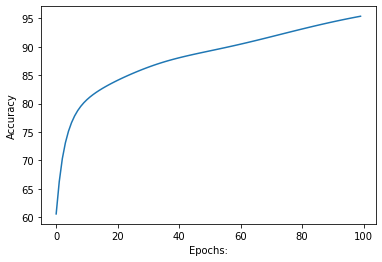

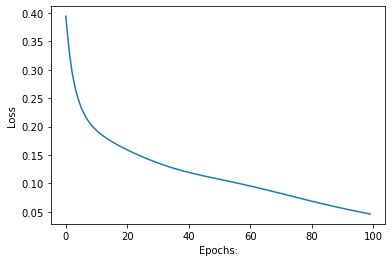

Image is of letter B.


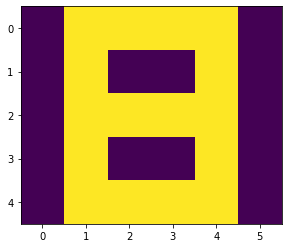

In [28]:
# activation function
 
def sigmoid(x):
    return(1/(1 + np.exp(-x)))
   
# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)
 
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1 
    a1 = sigmoid(z1)# out put of layer 2 
     
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return(a2)
  
# initializing the weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))
     
# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)
   
# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
     
    # hidden layer
    z1 = x.dot(w1)# input from layer 1 
    a1 = sigmoid(z1)# output of layer 2 
     
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
                                   (np.multiply(a1, 1-a1)))
 
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
     
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
     
    return(w1, w2)
 
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
#         print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)   
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)
  
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()

a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]
    
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]
y = np.array(y)
    
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()
 
# plotting Loss
plt.plot(losss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

predict(x[1], w1, w2)

In [27]:
import numpy as np

def generate_nn(truth_table):
    num_inputs = len(truth_table[0]) - 1  # Number of input neurons
    num_hidden = max(2, num_inputs // 2)   # Number of hidden neurons
    num_outputs = 1                        # Number of output neurons
    
    # Generate the input layer with 2^n neurons
    num_input_neurons = 2 ** num_inputs
    input_layer = [['O' for _ in range(num_input_neurons)]]
    
    # Generate the hidden layer
    hidden_layer = [['O' for _ in range(num_hidden)]]
    
    # Generate the output layer
    output_layer = [['O' for _ in range(num_outputs)]]
    
    # Combine layers to form the neural network
    nn_graph = input_layer + hidden_layer + output_layer
    
    return nn_graph

def display_nn_graph(graph):
    for layer in graph:
        print("".join(layer))

# Example truth table for a boolean function (AND gate)
truth_table_AND = [
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 1]
]

# Generate and display the neural network
nn_graph = generate_nn(truth_table_AND)
display_nn_graph(nn_graph)


OOOO
OO
O
